### A toy data set

Let's work on a toy dataset.



In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

That new last line imports the datasets module form sklearn. There are lost of real and toy data sets in here that are great for trying out techniques. See [sklearn.datasets](https://scikit-learn.org/stable/datasets.html) for more info. Today, we will explore the iris data set.

In [3]:
iris_data = datasets.load_iris()
print(iris_data['DESCR'])
print("-------------------")
print(type(iris_data))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
data = iris_data['data']
type(data)

numpy.ndarray

First, let's get some information about the data



In [5]:
print("the type is", type(data))
print("the shape is", data.shape)
print("the len is", len(data))
print("the number of dimensions is", np.ndim(data))
print("the first 5 entries are:\n", data[:5,])

the type is <class 'numpy.ndarray'>
the shape is (150, 4)
the len is 150
the number of dimensions is 2
the first 5 entries are:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


It is helpful to know what those columns are:

In [6]:
features = iris_data['feature_names']
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Note that in the data description, we have 4 data attributes and 1 predictive attribute. Let's look at the predictive attribute

In [7]:
target = iris_data['target']
print("the entries interget are:\n",target)

the entries interget are:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


So we can look at the unique set of values as:



In [8]:
np.unique(target)

array([0, 1, 2])

But what does that mean? Let's use target_names!



In [9]:
target_names = iris_data['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Sample Plotting

Let's add a basic library for plotting! There are lots of options, but the simplest and most core library is matplotlib. Hop over to the shell and add it to our environment.

Let's install this library

In [10]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt

Note that a lot of times, you will see matplotlib examples that just have plt... those assume that you have imported pyplot as plt.

So the simplest plot that we can do is a scatter plot. Let's create a scater plot of the "sepal length" and "sepal width". As those are the first two attributes, we can get them as follows

Text(0, 0.5, 'sepal width (cm)')

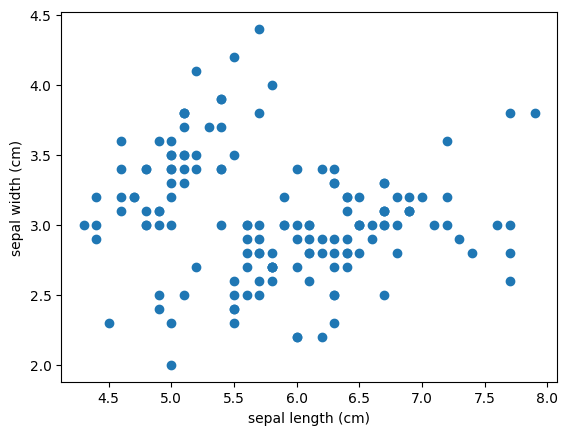

In [12]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel(features[0])
plt.ylabel(features[1])

Remember since you are working on a Jupyter Lab notebook, you don't have to explicityly call plt.show(), but if you are doing this in a normal python script you have to add plt.show()

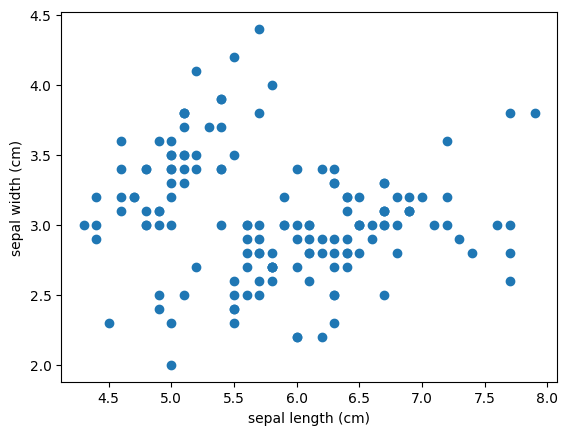

In [13]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

Note that we used the xlabel and ylabel functions to lable the axis. As a rule of thumb, labeling axis is a good habbit to get in to. 

Consider the following plot

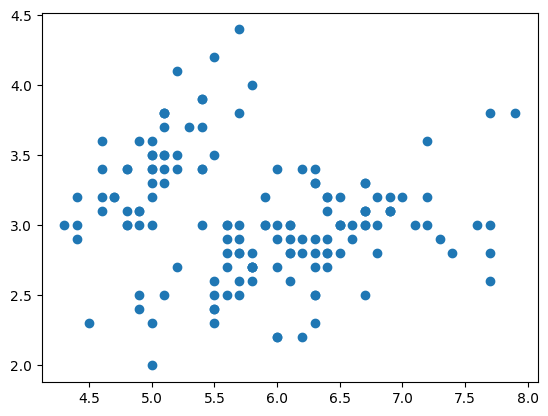

In [14]:
plt.scatter(data[:,0], data[:,1])

Recall that for each point, we have label. Often, when exploring labeled data, it can be convenient to visualize the data where each point is colored by label. We can use the c parameter to color our points

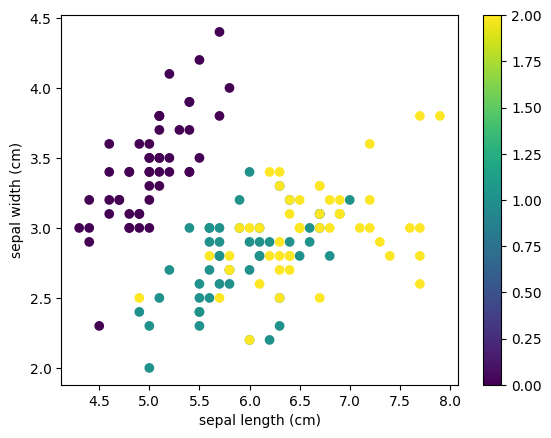

In [15]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar()  # Optional: Adds a color bar for target values


The length of the target array (which is used with c=target to color the points) should be the same as the number of rows in the data array (the number of data points you're plotting).

We could also look at other dimension combinations....

Let's make a simple function that enables us to do this easily..

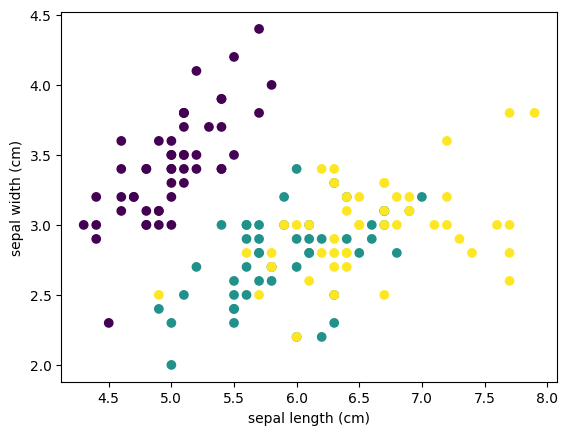

In [16]:
def scatter_plot(x, y):
    plt.scatter(data[:,x], data[:,y], c=target)
    plt.xlabel(features[x])
    plt.ylabel(features[y])

scatter_plot(0, 1)

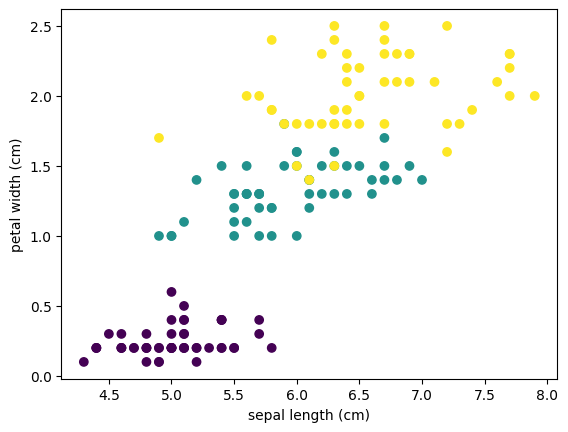

In [17]:
scatter_plot(0, 3)


We can even plot all of them at the same time. 

We are going to remove the labels because they get too messy here.

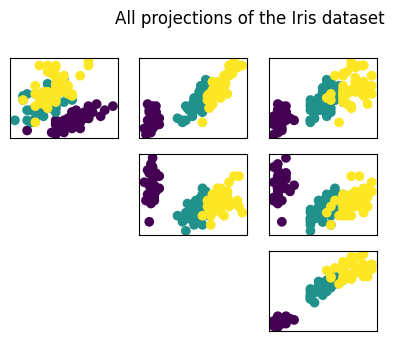

In [14]:
num_features = data.shape[1]
for i in range(num_features):
    for j in range(i):
        plt.subplot(num_features, num_features, j*num_features+i) 
        plt.scatter(data[:,i], data[:,j], c=target) # c = The marker colors.
        ax = plt.gca()   # get current axis
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

plt.suptitle('All projections of the Iris dataset')
plt.show()

# Three integers (nrows, ncols, index). The subplot will take the index position on a grid with nrows rows and ncols columns. 
# index starts at 1 in the upper left corner and increases to the right. 
# index can also be a two-tuple specifying the (first, last) indices (1-based, and including last) of the subplot

- plt.subplots() creates a figure (fig) and an axes object (ax) that we can use to plot on.
- fig: This represents the entire figure (plot), which can hold one or more subplots.
- ax: This represents the specific subplot (or axes) on which we will plot.

A legend in a plot is a key or guide that explains what each visual element (e.g., colors, shapes, or lines) in the plot represents. It typically appears in a separate area of the plot, often in a corner, and helps users identify what different colors or symbols correspond to in the context of the data.



['setosa' 'versicolor' 'virginica']


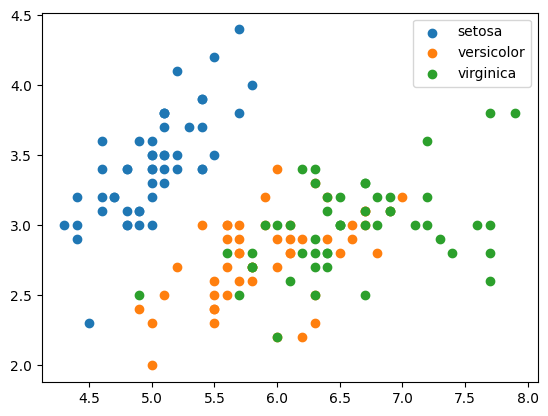

In [18]:
fig, ax = plt.subplots()
print(target_names)
for i, _ in enumerate(target_names):
    di = data[target==i]
    ax.scatter(di[:,0], di[:,1], label=iris_data['target_names'][i])
ax.legend();

A legend in a plot is a key or guide that explains what each visual element (e.g., colors, shapes, or lines) in the plot represents. It typically appears in a separate area of the plot, often in a corner, and helps users identify what different colors or symbols correspond to in the context of the data.

Try this without ax.legend()

['setosa' 'versicolor' 'virginica']


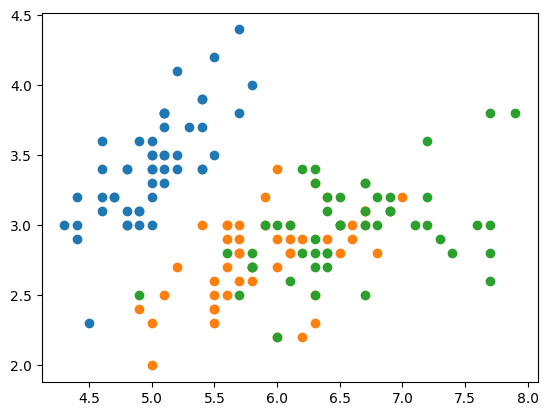

In [16]:
fig, ax = plt.subplots()
print(target_names)
for i, _ in enumerate(target_names):
    di = data[target==i]
    ax.scatter(di[:,0], di[:,1], label=iris_data['target_names'][i])

Text(0, 0.5, 'sepal width (cm)')

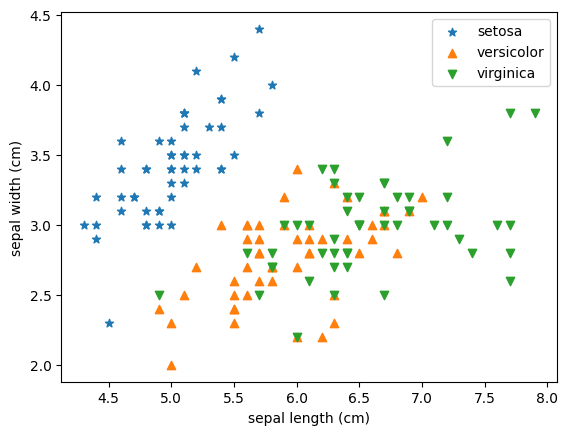

In [22]:
x = 0
y = 1

fig, ax = plt.subplots()

di = data[target==0]
ax.scatter(di[:,x], di[:,y], marker='*', label=iris_data['target_names'][0], )

di = data[target==1]
ax.scatter(di[:,x], di[:,y], marker='^', label=iris_data['target_names'][1], )

di = data[target==2]
ax.scatter(di[:,x], di[:,y], marker='v', label=iris_data['target_names'][2], )

ax.legend();
plt.xlabel(features[x])
plt.ylabel(features[y])

Same thing but in a clearer way

Text(0, 0.5, 'sepal width (cm)')

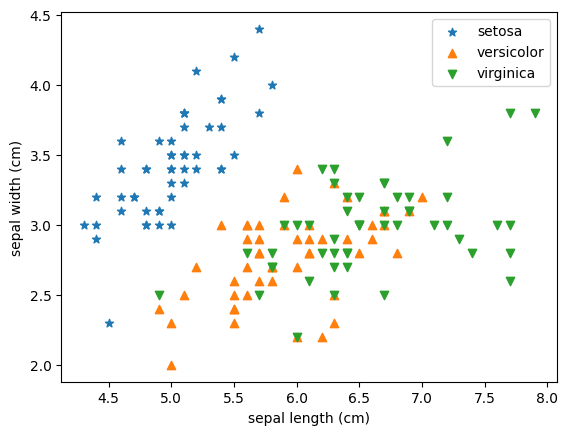

In [27]:
x = 0
y = 1
symbols = ['*', '^', 'v']

fig, ax = plt.subplots()
for i, _ in enumerate(iris_data['target_names']):
    di = data[target==i]
    ax.scatter(di[:,x], di[:,y], marker=symbols[i], label=iris_data['target_names'][i])

ax.legend();
plt.xlabel(features[x])
plt.ylabel(features[y])

How about bar plots...

<BarContainer object of 3 artists>

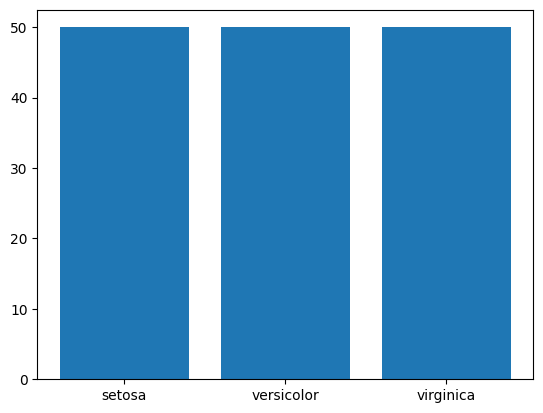

In [28]:
counts = [sum(target==0), sum(target==1), sum(target==2)]
plt.bar(target_names, counts)

One other thing I like to do to try things out is to just make some data. For example let's check out the histogram of nomally distrubted data cetered around 15

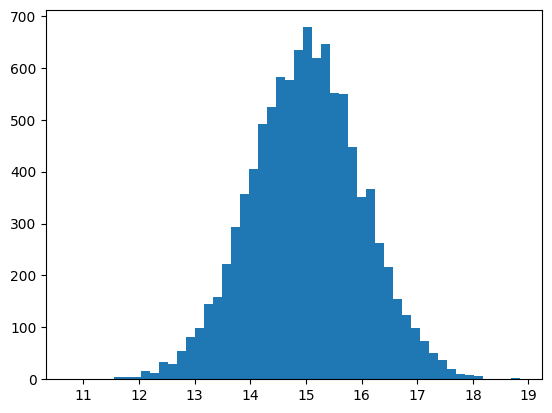

In [32]:
mu, sigma = 15, 1
x = mu + sigma * np.random.randn(10000)
_ = plt.hist(x, 50)

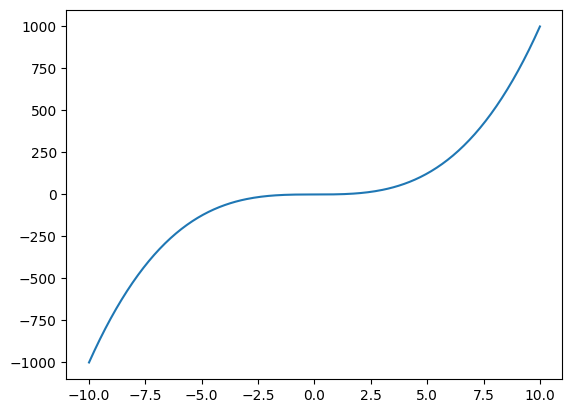

In [35]:
x = np.linspace(-10, 10, num=250)   #  to generate an array of evenly spaced numbers.
y = x**3
plt.plot(x, y)

If you like to learn more about this go to the following link and try their examples..

https://matplotlib.org/stable/gallery/index.html

For tutorials: https://matplotlib.org/stable/tutorials/index.html.